<a href="https://colab.research.google.com/github/shawntharoo/GoogleColabProjects/blob/main/Copy_of_MBA509_Lesson_11_Quantum_Computing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq
    print("installed cirq.")

In [ ]:
import cirq
import cirq_google

# Qubits

### https://quantumai.google/cirq/tutorials/basics

### The first part of creating a quantum circuit is to define a set of qubits (also known as a quantum registers) to act on.

### Cirq has three main ways of defining qubits:

* cirq.NamedQubit: used to label qubits by an abstract name
* cirq.LineQubit: qubits labelled by number in a linear array
* cirq.GridQubit: qubits labelled by two numbers in a rectangular lattice.

## Name qubits

In [ ]:
# Using named qubits can be useful for abstract algorithms
# as well as algorithms not yet mapped onto hardware.
q0 = cirq.NamedQubit('Amy')
q1 = cirq.NamedQubit('Tom')

print(q0)
print(q1)

Amy
Tom


### A line qubit

In [ ]:
# Line qubits can be created individually
q3 = cirq.LineQubit(3)
q3

cirq.LineQubit(3)

In [ ]:
# Or created in a range
# This will create LineQubit(0), LineQubit(1), LineQubit(2)
q0, q1, q2 = cirq.LineQubit.range(3)

In [ ]:
print(q0, q1, q2)

0 1 2


### Grid qubit

In [ ]:
# Grid Qubits can also be referenced individually
q4_5 = cirq.GridQubit(4,5)
print(q4_5)

(4, 5)


In [ ]:
# Or created in bulk in a square
# This will create 16 qubits from (0,0) to (3,3)
qubits = cirq.GridQubit.square(4)

In [ ]:
print(qubits)

[cirq.GridQubit(0, 0), cirq.GridQubit(0, 1), cirq.GridQubit(0, 2), cirq.GridQubit(0, 3), cirq.GridQubit(1, 0), cirq.GridQubit(1, 1), cirq.GridQubit(1, 2), cirq.GridQubit(1, 3), cirq.GridQubit(2, 0), cirq.GridQubit(2, 1), cirq.GridQubit(2, 2), cirq.GridQubit(2, 3), cirq.GridQubit(3, 0), cirq.GridQubit(3, 1), cirq.GridQubit(3, 2), cirq.GridQubit(3, 3)]


### There are also pre-packaged sets of qubits called Devices. These are qubits along with a set of rules of how they can be used. A cirq.Device can be used to apply adjacency rules and other hardware constraints to a quantum circuit. For our example, we will use the cirq_google.Foxtail device that comes with cirq. It is a 2x11 grid that mimics early hardware released by Google.

In [ ]:
print(cirq_google.Foxtail)

(0, 0)───(0, 1)───(0, 2)───(0, 3)───(0, 4)───(0, 5)───(0, 6)───(0, 7)───(0, 8)───(0, 9)───(0, 10)
│        │        │        │        │        │        │        │        │        │        │
│        │        │        │        │        │        │        │        │        │        │
(1, 0)───(1, 1)───(1, 2)───(1, 3)───(1, 4)───(1, 5)───(1, 6)───(1, 7)───(1, 8)───(1, 9)───(1, 10)


# Gates and Operations

* A Gate is an effect that can be applied to a collection of qubits (objects with a Qid)

*  Gates can generally be applied to any type of qubit (NamedQubit, LineQubit, GridQubit, etc. - see Qubits for more details) to create an Operation.

That is,

* An Operation is a gate applied to a set of qubits.
* A Gate is an effect that can be applied to a set of qubits.

In [ ]:
# This examples uses named qubits to remain abstract.
# However, we can also use LineQubits or GridQubits to specify a geometry
amy = cirq.NamedQubit('a')
brad = cirq.NamedQubit('b')
cam = cirq.NamedQubit('c')

# Example Operations, that correspond to the moments above
print(cirq.H(brad))
print(cirq.H(amy))
print(cirq.measure(amy,brad))

H(b)
H(a)
cirq.MeasurementGate(2, cirq.MeasurementKey(name='a,b'), ())(a, b)


In [ ]:
amy.__dict__

{'_comp_key': 'a', '_name': 'a'}

# CNOT and Pauli Z Gates

In [ ]:
print(cirq.CNOT(brad, cam))
print(cirq.CNOT(amy, brad))

CNOT(b, c)
CNOT(a, b)


In [ ]:
# Example gates
not_gate = cirq.CNOT
pauli_z = cirq.Z

print(not_gate)
print(pauli_z)

CNOT
Z


In [ ]:
# Using exponentiation to get square root gates
sqrt_x_gate = cirq.X**0.5

In [ ]:
# Some gates can also take parameters
sqrt_sqrt_y = cirq.YPowGate(exponent=0.25)

In [ ]:
# Example operations
q0, q1 = cirq.LineQubit.range(2)
print(q0,q1)

0 1


In [ ]:
z_op = cirq.Z(q0)
z_op

Z(0)

In [ ]:
not_op = cirq.CNOT(q0, q1)
not_op

cirq.CNOT(cirq.LineQubit(0), cirq.LineQubit(1))

In [ ]:
sqrt_iswap_op = cirq.SQRT_ISWAP(q0, q1)
sqrt_iswap_op

(cirq.ISWAP**0.5).on(cirq.LineQubit(0), cirq.LineQubit(1))

# Circuits and moments

### A Circuit is a collection of Moments. A Moment is a collection of Operations that all act during the same abstract time slice. Each Operation must have a disjoint set of qubits from the other Operations in the Moment. A Moment can be thought of as a vertical slice of a quantum circuit diagram.

In [ ]:
circuit = cirq.Circuit()
# You can create a circuit by appending to it
circuit.append(cirq.H(q) for q in cirq.LineQubit.range(3))
# All of the gates are put into the same Moment since none overlap
print(circuit)

0: ───H───

1: ───H───

2: ───H───


In [ ]:
# We can also create a circuit directly as well:
print(cirq.Circuit(cirq.SWAP(q, q+1) for q in cirq.LineQubit.range(3)))

0: ───×───────────
      │
1: ───×───×───────
          │
2: ───────×───×───
              │
3: ───────────×───


In [ ]:
# Creates each gate in a separate moment.
print(cirq.Circuit(cirq.Moment([cirq.H(q)]) for q in cirq.LineQubit.range(3)))

0: ───H───────────

1: ───────H───────

2: ───────────H───


# Circuits and devices

In [ ]:
q0 = cirq.GridQubit(0, 0)
q1 = cirq.GridQubit(0, 1)
q2 = cirq.GridQubit(0, 2)
adjacent_op = cirq.CZ(q0, q1)
nonadjacent_op = cirq.CZ(q0, q2)

In [ ]:
# This is an unconstrained circuit with no device
free_circuit = cirq.Circuit()
# Both operations are allowed:
free_circuit.append(adjacent_op)
free_circuit.append(nonadjacent_op)
print('Unconstrained device:')
print(free_circuit)
print()

Unconstrained device:
(0, 0): ───@───@───
           │   │
(0, 1): ───@───┼───
               │
(0, 2): ───────@───



In [ ]:
# This is a circuit on the Foxtail device
# only adjacent operations are allowed.
print('Foxtail device:')
foxtail_circuit = cirq.Circuit(device=cirq_google.Foxtail)
foxtail_circuit.append(adjacent_op)
try:
    # Not allowed, will throw exception
    foxtail_circuit.append(nonadjacent_op)
except ValueError as e:
    print('Not allowed. %s' % e)

Foxtail device:
Not allowed. Non-local interaction: cirq.CZ(cirq.GridQubit(0, 0), cirq.GridQubit(0, 2)).


#Simulation
### The results of the application of a quantum circuit can be calculated by a Simulator

In [ ]:
# Create a circuit to generate a Bell State:
# 1/sqrt(2) * ( |00⟩ + |11⟩ )
bell_circuit = cirq.Circuit()
q0, q1 = cirq.LineQubit.range(2)
bell_circuit.append(cirq.H(q0))
bell_circuit.append(cirq.CNOT(q0,q1))

In [ ]:
# Initialize Simulator
s=cirq.Simulator()

In [ ]:
print('Simulate the circuit:')
results=s.simulate(bell_circuit)
print(results)
print()

Simulate the circuit:
measurements: (no measurements)
output vector: 0.707|00⟩ + 0.707|11⟩



In [ ]:
# For sampling, we need to add a measurement at the end
bell_circuit.append(cirq.measure(q0, q1, key='result'))

In [ ]:
print('Sample the circuit:')
samples=s.run(bell_circuit, repetitions=1000)
# Print a histogram of results
print(samples.histogram(key='result'))

Sample the circuit:
Counter({3: 509, 0: 491})


# Using parameter sweeps

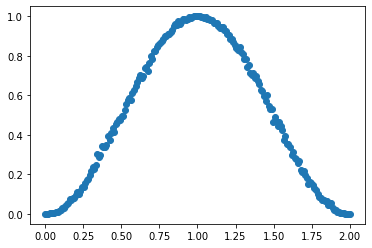

In [ ]:
import matplotlib.pyplot as plt
import sympy

# Perform an X gate with variable exponent
q = cirq.GridQubit(1,1)
circuit = cirq.Circuit(cirq.X(q) ** sympy.Symbol('t'),
                       cirq.measure(q, key='m'))

# Sweep exponent from zero (off) to one (on) and back to two (off)
param_sweep = cirq.Linspace('t', start=0, stop=2, length=200)

# Simulate the sweep
s = cirq.Simulator()
trials = s.run_sweep(circuit, param_sweep, repetitions=1000)

# Plot all the results
x_data = [trial.params['t'] for trial in trials]
y_data = [trial.histogram(key='m')[1] / 1000.0 for trial in trials]
plt.scatter('t','p', data={'t': x_data, 'p': y_data})

# Unitary matrices and decompositions

In [ ]:
print('Unitary of the X gate')
print(cirq.unitary(cirq.X))

print('Unitary of SWAP operator on two qubits.')
q0, q1 = cirq.LineQubit.range(2)
print(cirq.unitary(cirq.SWAP(q0, q1)))

print('Unitary of a sample circuit')
print(cirq.unitary(cirq.Circuit(cirq.X(q0), cirq.SWAP(q0, q1))))

Unitary of the X gate
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]
Unitary of SWAP operator on two qubits.
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]
Unitary of a sample circuit
[[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


# Decompositions

In [ ]:
print(cirq.decompose(cirq.H(cirq.LineQubit(0))))

[(cirq.Y**0.5).on(cirq.LineQubit(0)), cirq.XPowGate(exponent=1.0, global_shift=-0.25).on(cirq.LineQubit(0))]


### decomposes the Toffoli into a simpler set of one-qubit gates and CZ gates at the cost of lengthening the circuit considerably.

In [ ]:
q0, q1, q2 = cirq.LineQubit.range(3)
print(cirq.Circuit(cirq.decompose(cirq.TOFFOLI(q0, q1, q2))))

0: ───T────────────────@─────────────────────────────────@─────────────────────────────@────────────────────────────@───────────────────────────────────────
                       │                                 │                             │                            │
1: ───T───────Y^-0.5───@───Y^0.5────@───T^-1────Y^-0.5───@────────Y^0.5───@───Y^-0.5───@──────Y^0.5────@───Y^-0.5───@──────Y^0.5────@───────────────────────
                                    │                                     │                            │                            │
2: ───Y^0.5───X────────T───Y^-0.5───@───Y^0.5───T────────Y^-0.5───────────@───Y^0.5────T^-1───Y^-0.5───@───Y^0.5────T^-1───Y^-0.5───@───Y^0.5───Y^0.5───X───


In [ ]:
swap = cirq.SWAP(cirq.GridQubit(0, 0), cirq.GridQubit(0, 1))
print(cirq.Circuit(swap, device=cirq_google.Foxtail))

(0, 0): ───S^-1───Y^-0.5───@───S^-1───Y^0.5───X^0.5───@───S^-1───X^-0.5───@───S^-1───Z───
                           │                          │                   │
(0, 1): ───Z──────Y^-0.5───@───S^-1───Y^0.5───X^0.5───@───S^-1───X^-0.5───@───S^-1───S───


# Optimizers

*  An optimizer can take a circuit and modify it.

In [ ]:
q=cirq.GridQubit(1, 1)
optimizer=cirq.MergeSingleQubitGates()
c=cirq.Circuit(cirq.X(q) ** 0.25, cirq.Y(q) ** 0.25, cirq.Z(q) ** 0.25)
print(c)
optimizer.optimize_circuit(c)
print(c)

(1, 1): ───X^0.25───Y^0.25───T───
           ┌                           ┐
(1, 1): ───│ 0.5  +0.707j -0.   -0.5j  │───────────
           │ 0.354+0.354j  0.146+0.854j│
           └                           ┘


In [ ]:
"""One method to insert noise in a circuit."""
# Define some noiseless circuit.
circuit = cirq.testing.random_circuit(
    qubits=3, n_moments=3, op_density=1, random_state=11
)

# Display the noiseless circuit.
print("Circuit without noise:")
print(circuit)

# Add noise to the circuit.
noisy = circuit.with_noise(cirq.depolarize(p=0.01))

# Display it.
print("\nCircuit with noise:")
print(noisy)

Circuit without noise:
              ┌──┐
0: ───@───X─────×────
      │   │     │
1: ───@───┼────S┼────
          │     │
2: ───Z───@─────×────
              └──┘

Circuit with noise:
                                                                        ┌──┐
0: ───@───D(0.01)[cirq.VirtualTag()]───X───D(0.01)[cirq.VirtualTag()]─────×────D(0.01)[cirq.VirtualTag()]───
      │                                │                                  │
1: ───@───D(0.01)[cirq.VirtualTag()]───┼───D(0.01)[cirq.VirtualTag()]────S┼────D(0.01)[cirq.VirtualTag()]───
                                       │                                  │
2: ───Z───D(0.01)[cirq.VirtualTag()]───@───D(0.01)[cirq.VirtualTag()]─────×────D(0.01)[cirq.VirtualTag()]───
                                                                        └──┘


In [ ]:
"""Add noise to an operation, moment, or sequence of moments."""
# Create a noise model.
noise_model = cirq.NoiseModel.from_noise_model_like(cirq.depolarize(p=0.01))

# Get a qubit register.
qreg = cirq.LineQubit.range(2)

# Add noise to an operation.
op = cirq.CNOT(*qreg)
noisy_op = noise_model.noisy_operation(op)

# Add noise to a moment.
moment = cirq.Moment(cirq.H.on_each(qreg))
noisy_moment = noise_model.noisy_moment(moment, system_qubits=qreg)

# Add noise to a sequence of moments.
circuit = cirq.Circuit(cirq.H(qreg[0]), cirq.CNOT(*qreg))
noisy_circuit = noise_model.noisy_moments(circuit, system_qubits=qreg)

## Monte Carlo wavefunction simulation

In [ ]:
"""Simulating a noisy circuit via Monte Carlo simulation."""
# Get a circuit.
qbit = cirq.NamedQubit("Q")
circuit = cirq.Circuit(cirq.bit_flip(p=0.5).on(qbit))

# Display it.
print("Simulating circuit:")
print(circuit)

# Simulate with the cirq.Simulator.
sim = cirq.Simulator()
psi = sim.simulate(circuit).dirac_notation()

# Display the final wavefunction.
print("\nFinal wavefunction:")
print(psi)

Simulating circuit:
Q: ───BF(0.5)───

Final wavefunction:
|0⟩


In [ ]:
"""Example of Monte Carlo wavefunction simulation with the `run` method."""
circuit = cirq.Circuit(
    cirq.bit_flip(p=0.5).on(qbit),
    cirq.measure(qbit),
)
res = sim.run(circuit, repetitions=100)
print(res.histogram(key=qbit))

Counter({0: 53, 1: 47})
